<a href="https://www.kaggle.com/code/mdbadrulislam/opencv?scriptVersionId=124082356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![OpenCV](https://opencv.org/wp-content/uploads/2022/05/logo.png)

OpenCV is a Python open-source library, which is used for computer vision in Artificial intelligence, Machine Learning, face recognition, etc.

In OpenCV, the CV is an abbreviation form of a computer vision, which is defined as a field of study that helps computers to understand the content of the digital images such as photographs and videos.

The purpose of computer vision is to understand the content of the images. It extracts the description from the pictures, which may be an object, a text description, and three-dimension model, and so on. For example, cars can be facilitated with computer vision, which will be able to identify and different objects around the road, such as traffic lights, pedestrians, traffic signs, and so on, and acts accordingly.

OpenCV was initially an Intel research initiative to advise CPU-intensive applications. It was officially launched in 1999.

* In 2000, The first alpha version of OpenCV was released for the common use at the IEEE Conference on Computer Vision and Pattern Recognition 
* between 2001 and 2005, five betas were released. 
* In the year 2006, its first major version, OpenCV 1.0 was released.
* In October 2009, the second major version, OpenCV 2 was released with the significant changes. 
* In August 2012, OpenCV was taken by a nonprofit organization OpenCV.org.

Currently, the development is done by an independent Russian team and releases its newer version in every six months.

In [1]:
# Loading libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# OpenCV version
cv2.__version__

'4.5.4'

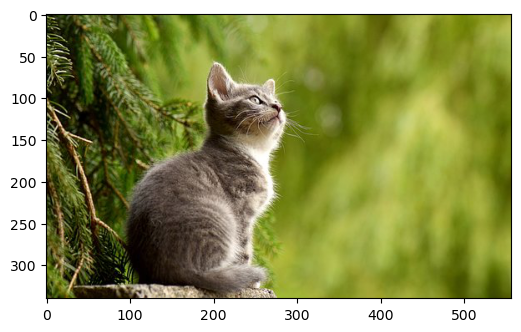

In [3]:
# Showing Original Image
plt.figure(figsize=(6,8))
image = plt.imread('../input/cat-image/cat-2083492__340.jpg')
plt.imshow(image)

# Display all open figures.
plt.show()

In [4]:
# Image dimensions
print(f"image shape: {image.shape}")
print("image Height = {}, width = {}, color channel = {}".format(image.shape[0], image.shape[1], image.shape[2]))
print("image size: {}".format(image.size))

image shape: (340, 557, 3)
image Height = 340, width = 557, color channel = 3
image size: 568140


When the image file is read with the OpenCV function **imread()**, the order of colors is **BGR** (blue, green, red). On the other hand, in **Pillow**, the order of colors is assumed to be **RGB** (red, green, blue).

Therefore, if want to use both the Pillow function and the OpenCV function, need to convert BGR and RGB.

You can use the OpenCV function cvtColor() or simply change the order of ndarray.

In [5]:
len(image.shape)

3

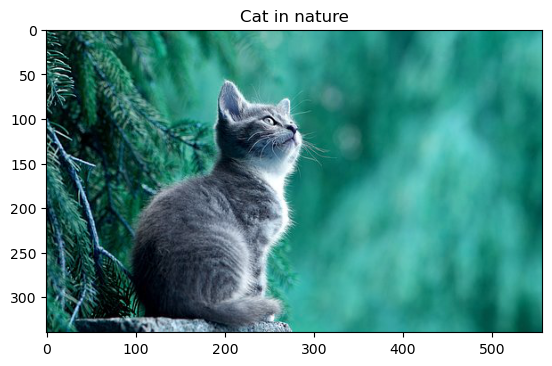

In [6]:
# Function to show images with title
def catImageShow(img, title):
    
    # convert image from one color space to another.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # displaying image
    plt.imshow(img)
    plt.title(title)

catImageShow(image, "Cat in nature")

In [7]:
# Mask with image shape
mask = np.zeros(image.shape[:2], dtype="uint8")
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
# Types of mask
mask_test = mask.copy()

# cv2.rectangle(image, start_point, end_point, color, thickness)
cv2.rectangle(mask_test,(0,50),(45,100),255, -1)
# cv2.line(image, start_point, end_point, color, thickness) 
cv2.line(mask_test,(0,50),(45,100),0)
# cv2.circle(image, center_coordinates, radius, color, thickness)
cv2.circle(mask_test,(278,170),140,255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

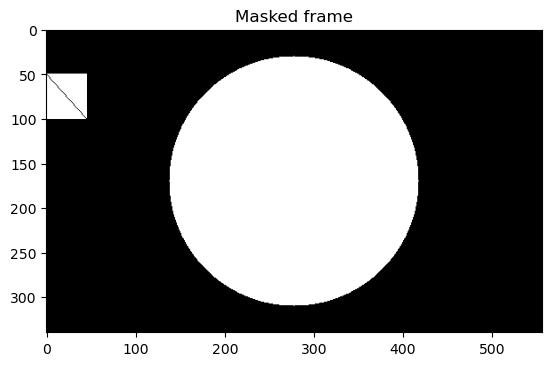

In [9]:
# Mask frame
catImageShow(mask_test, "Masked frame")

Bitwise operations are used in image manipulation and used for extracting essential parts in the image. Bitwise operations should be applied on input images of same dimensions

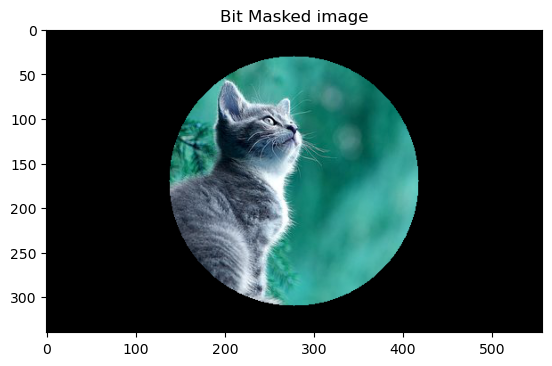

In [10]:
# arithmetic operation of two images and applied mask
cv2.circle(mask,(278,170),140,255, -1)
bit_mask = cv2.bitwise_and(image,image,mask=mask)
catImageShow(bit_mask,"Bit Masked image")

In [11]:
# Image scalling
image/255

array([[[0.10980392, 0.18431373, 0.        ],
        [0.18823529, 0.25882353, 0.0627451 ],
        [0.16078431, 0.22352941, 0.04705882],
        ...,
        [0.62352941, 0.63921569, 0.20784314],
        [0.62745098, 0.64313725, 0.21176471],
        [0.62352941, 0.63921569, 0.20784314]],

       [[0.05490196, 0.12156863, 0.        ],
        [0.03137255, 0.09411765, 0.        ],
        [0.04313725, 0.09411765, 0.        ],
        ...,
        [0.62745098, 0.64313725, 0.21176471],
        [0.63137255, 0.64705882, 0.21568627],
        [0.63137255, 0.64705882, 0.21568627]],

       [[0.58823529, 0.64705882, 0.51764706],
        [0.41960784, 0.47058824, 0.35294118],
        [0.15686275, 0.19607843, 0.09803922],
        ...,
        [0.63921569, 0.65490196, 0.22352941],
        [0.64313725, 0.65882353, 0.22745098],
        [0.64313725, 0.65882353, 0.22745098]],

       ...,

       [[0.10980392, 0.20392157, 0.01568627],
        [0.18039216, 0.2745098 , 0.03137255],
        [0.29803922, 0

### Image reshape

In [12]:
# Custom shape
ratio = 120/image.shape[1]
newDim = (120, int(image.shape[0] * ratio))
ratio, newDim

(0.21543985637342908, (120, 73))

 Interpolation maintains the images quality

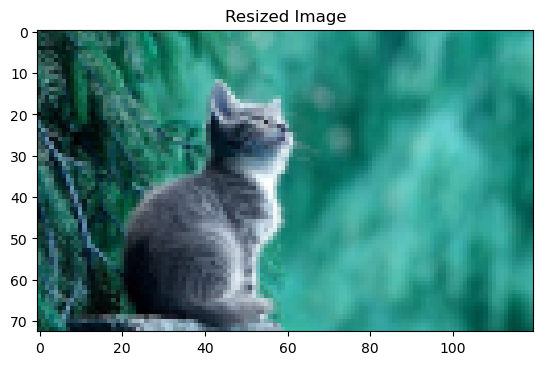

In [13]:
# Image in custom shape
newImage = cv2.resize(image,newDim, interpolation= cv2.INTER_AREA)
catImageShow(newImage, "Resized Image")

In [14]:
newImage.shape

(73, 120, 3)

### Rotation

In [15]:
# Original image shape
imageH,imageW = image.shape[:2]
imageH,imageW

(340, 557)

In [16]:
# Center point of image
center = (imageW//2, imageH//2)
center

(278, 170)

M = \begin{bmatrix} \alpha & \beta & (1-\alpha)\cdot c_x-\beta \cdot c_y\\ -\beta & \alpha & \beta\cdot c_x+(1-\alpha) \cdot c_y \end{bmatrix}

An affine transformation is transformation which preserves lines and parallelism. These transformation matrix are taken by warpaffine() function as parameter and the rotated image will be returned.

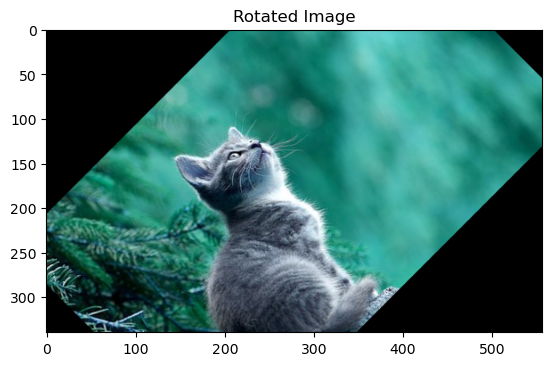

In [17]:
# Transformation matrix for rotation
# cv2.getRotationMatrix2D(center, angle, scale)
imageRotate = cv2.getRotationMatrix2D(center,45,1)

# apply transformation to image
# cv2.warpAffine(src, M, dsize=(Width,height), dst, flags, borderMode, borderValue)
rotateNow = cv2.warpAffine(image,imageRotate,(imageW,imageH))

catImageShow(rotateNow,"Rotated Image")

## Gradient filters

OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian

### Sobel Derivatives

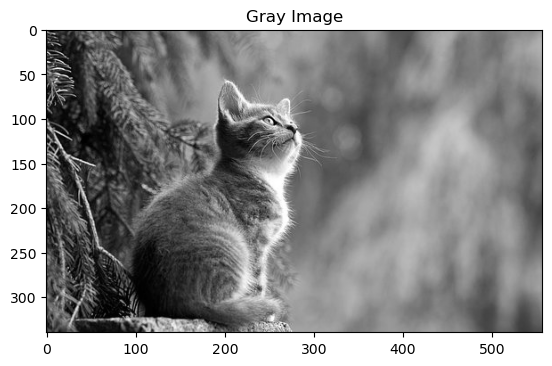

In [18]:
# convert an image to grayscale
grayImg = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
catImageShow(grayImg,"Gray Image") 

In [19]:
grayImg.shape

(340, 557)

In [20]:
argumentImage = {
    "src":"../input/cat-image/cat-2083492__340.jpg",
    "scharr":0
}

In [21]:
kernelGen = -1 if argumentImage["scharr"]>0 else 3

Image derivatives are highly used in detecting the edges of the image. Image derivatives locate the places in the image where the pixel intensity changes in a drastic manner. <br/>
gradient is a vector-valued function, as opposed to a derivative, which is scalar-valued. Like the derivative, the gradient represents the slope of the tangent of the graph of the function. More precisely, the gradient points in the direction of the greatest rate of increase of the function, and its magnitude is the slope of the graph in that direction.<br/>
In computer vision, transitioning from black-to-white is considered a positive slope, whereas a transition from white-to-black is a negative slope.<br/>

Sobel operator is one of the available techniques to extract the derivative of an image. It is a combination of Gaussian Smoothing and differentiation,so it is more resistant to noise. Sobel operator is also used to detect two kinds of edges in an image:

* Vertical direction
* Horizontal direction

Sobel-X Operator = [-1 0 1; -2 0 2; -1 0 1]

Sobel-Y Operator = [-1 -2 -1; 0 0 0; 1 2 1]

In [22]:
# cv2.Sobel(original_image,ddepth,xorder,yorder,kernelsize)
# When ddepth=-1/CV_64F, the destination image will have the same depth as the source
sobelX = cv2.Sobel(grayImg, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=kernelGen)
sobelX

array([[   0.,   12.,    6., ...,   12.,    2.,    0.],
       [   0., -112.,  -67., ...,   13.,    3.,    0.],
       [   0., -210., -240., ...,   15.,    5.,    0.],
       ...,
       [   0.,  165.,   70., ...,   10.,   10.,    0.],
       [   0.,  192.,  106., ...,    9.,    9.,    0.],
       [   0.,  194.,  112., ...,    8.,    8.,    0.]], dtype=float32)

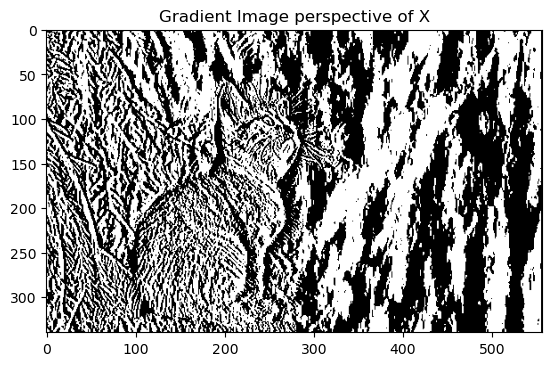

In [23]:
catImageShow(sobelX, "Gradient Image perspective of X")

In [24]:
# ddepth=-1/CV_64F, the destination image will have the same depth as the source
sobelY = cv2.Sobel(grayImg, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=kernelGen)
sobelY

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [358., 234.,  37., ...,  15.,  17.,  18.],
       [588., 614., 540., ...,  21.,  23.,  24.],
       ...,
       [-46., -21.,  34., ...,  -8.,  -8.,  -8.],
       [-28., -26., -18., ...,  -9., -11., -12.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

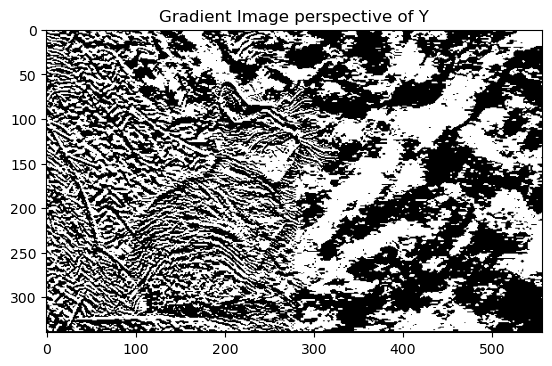

In [25]:
catImageShow(sobelY, "Gradient Image perspective of Y")

In [26]:
# combine sobel x and y
sobel = cv2.bitwise_and(sobelX, sobelY)
sobel

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , 56.  , 33.  , ..., 13.  ,  2.  ,  0.  ],
       [ 0.  ,  2.25,  2.  , ..., 10.  ,  5.  ,  0.  ],
       ...,
       [ 0.  , 10.  , 34.  , ...,  8.  ,  8.  ,  0.  ],
       [ 0.  , 12.  ,  4.5 , ...,  9.  ,  9.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]], dtype=float32)

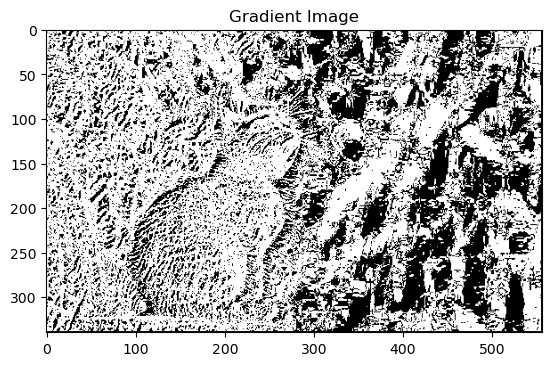

In [27]:
catImageShow(sobel, "Gradient Image")

### Laplacian Derivatives

Laplacian Operator is also a derivative operator which is used to find edges in an image. The major difference between Laplacian and other operators like Prewitt, Sobel, Robinson and Kirsch is that these all are first order derivative masks but Laplacian is a second order derivative mask. Laplacian take out edges in following classification.

* Inward Edges <br/>
[0, -1, 0 ; -1, 4, -1 ; 0, -1, 0] <br/>
    negative Laplacian operator we also have a standard mask, in which center element should be positive. All the elements in the corner should be zero and rest of all the elements in the mask should be -1.
* Outward Edges <br/>
[0, 1, 0 ; 1, -4, 1 ; 0, 1, 0] <br/>
Positive Laplacian in which center element of the mask should be negative and corner elements of mask should be zero.Positive Laplacian Operator is use to take out outward edges in an image.

Laplacian is a derivative operator; its uses highlight gray level discontinuities in an image and try to deemphasize regions with slowly varying gray levels.
we can’t apply both the positive and negative Laplacian operator on the same image. we have to apply just one but the thing to remember is that if we apply positive Laplacian operator on the image then we subtract the resultant image from the original image to get the sharpened image. Similarly if we apply negative Laplacian operator then we have to add the resultant image onto original image to get the sharpened image.

In [28]:
# cv2.Laplacian(frame,cv2.CV_64F)
# ddepth=-1/CV_64F, the destination image will have the same depth as the source
laplacian = cv2.Laplacian(image,cv2.CV_32F)
laplacian

array([[[  12.,    6.,   32.],
        [-107., -112.,  -52.],
        [ -65.,  -73.,  -29.],
        ...,
        [   1.,    1.,    1.],
        [   0.,    0.,    0.],
        [   6.,    6.,    6.]],

       [[ 138.,  136.,  132.],
        [ 148.,  145.,  106.],
        [  82.,   82.,   60.],
        ...,
        [   1.,    1.,    1.],
        [   1.,    1.,    1.],
        [   1.,    1.,    1.]],

       [[-227., -230., -225.],
        [ -55.,  -51.,  -52.],
        [ 141.,  148.,  130.],
        ...,
        [  -3.,   -3.,   -3.],
        [  -1.,   -1.,   -1.],
        [   0.,    0.,    0.]],

       ...,

       [[  35.,   35.,   12.],
        [   9.,    5.,    9.],
        [ -38.,  -43.,  -27.],
        ...,
        [   0.,    1.,    1.],
        [  -2.,   -3.,   -1.],
        [  -4.,   -4.,   -8.]],

       [[  54.,   54.,   10.],
        [  17.,   13.,   22.],
        [ -38.,  -43.,  -27.],
        ...,
        [  -1.,    0.,    0.],
        [   2.,    1.,    3.],
        [  -1.,

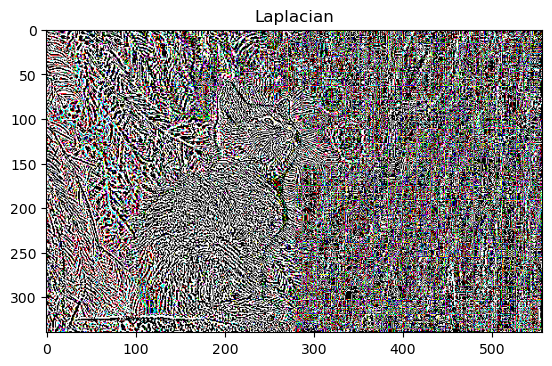

In [29]:
catImageShow(laplacian,"Laplacian")

#### Comparison

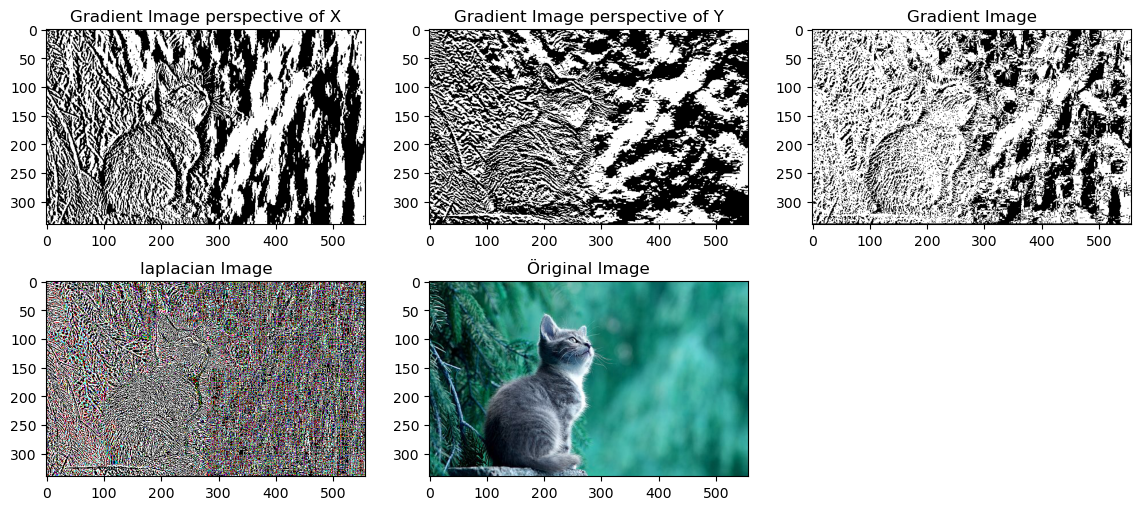

In [30]:
plt.figure(figsize=(14,6))

plt.subplot(2, 3, 1)
catImageShow(sobelX, "Gradient Image perspective of X")

plt.subplot(2, 3, 2)
catImageShow(sobelY, "Gradient Image perspective of Y")

plt.subplot(2, 3, 3)
catImageShow(sobel, "Gradient Image")

plt.subplot(2, 3, 4)
catImageShow(laplacian, "laplacian Image")


plt.subplot(2, 3, 5)
catImageShow(image,"Öriginal Image")

plt.show()